# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [0]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       coef=True)

In [10]:
X.shape
y.shape

(100,)

In [11]:
X
y

array([  11.53485189,  -66.78103659,   11.54184614,  -45.46060758,
       -130.57522775,  -61.80354621,  -78.82405201,   -5.52030807,
        -30.21885715,  165.55255054, -112.64693342,  106.90160571,
        -58.10971419,    0.93779626,  -43.61435122,   26.95725272,
        -42.66951584,  -57.13556708,  -95.79615005,  118.35209797,
        -51.4373238 ,   84.19876031,  131.21777646,  -46.29521229,
         21.0677083 ,  -94.24874166,  -40.44179061,  -88.60315002,
         55.92737987,   -3.31000877,  -74.78446006,   20.5147989 ,
        -62.67644286,   56.03461688, -157.7787645 ,  143.08307335,
         15.3388511 ,   -9.59788063,   81.74740666,   71.32138227,
         53.87402664,   -0.68947083, -141.90224262,  114.66818014,
         23.3021041 ,   21.99009826,  -35.28545232, -129.8408221 ,
        -94.74229488,  -75.84916088,   83.65977299,  112.44087428,
        -55.5829791 ,  101.61972743,  -19.92492782,   29.31837579,
        -32.59780898,  -68.49724243,  -27.785417  ,    2.34156

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

We are fitting a model with an intercept. Lets see what it is.

In [12]:
coef

array(80.88336208)

We can plot the data.

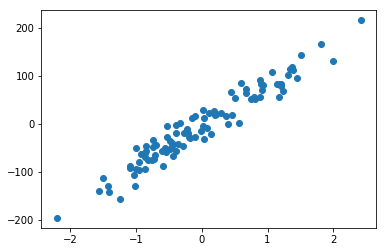

In [13]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [0]:
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)
#reshape just converts the size of the array

In [15]:
Xgrid.shape,xgrid.shape
#xgrid is avector and Xgrid is a matrix

((1000, 1), (1000,))

## Fit using sklearn

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

In [0]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [0]:
from sklearn.metrics import r2_score

In [0]:
r2_score(y, lr.predict(X))

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [0]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

In [0]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [0]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

In [0]:
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

In [0]:
# your code here


In [0]:
# your code here


In [0]:
# your code here


In [0]:
# your code here


In [0]:
# your code here


## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [0]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [0]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [0]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

In [0]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

In [0]:
plt.plot(history.history['loss'])

In [0]:
lr3.get_weights()

### Using the Keras Functional API



In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

In [0]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

In [0]:
m.get_weights()